In [ ]:
!mkdir models
!pip install -q numpy opencv-python matplotlib tensorflow

!bash ./load_models.sh
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/9/99/JPEG_20190317_010417.jpg -O ./data/test_img.jpg

In [4]:
from hand_tracking import HandTracker, IfGestureRecognizer, XgbGestureRecognizer
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

palm_model_path = "./models/palm_detection_without_custom_op.tflite"
landmark_model_path = "./models/hand_landmark.tflite"
anchors_path = "./data/anchors.csv" 

detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.2)

recognizerIf = IfGestureRecognizer()
recognizerXgb = XgbGestureRecognizer("./models/xgb.pkl")

In [5]:
img = cv2.imread('./data/test_img.jpg')[:,:,::-1]

/Users/danil.akhmetov/ODKL/hand_tracking/hand_tracking/hand_tracker.py:97: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


IF - ('five', 1.0)
XGB - ('five', 0.92221266)


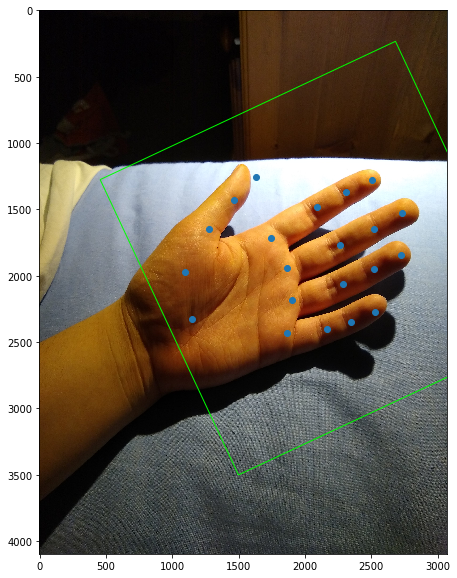

In [8]:
img = cv2.imread("./data/test_img.jpg")[:,:,::-1]
# img = cv2.resize(img, (256,256))

f,ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(img)

kps, boxes = detector(img)
gestures = dict()
for (kp, box) in zip(kps, boxes):
    print(f"IF - {recognizerIf(kp.copy())}")
    print(f"XGB - {recognizerXgb(kp.copy())}")

    box = box.astype(int)
    ax.scatter(kp[:,0], kp[:,1])
    # ax.scatter(212-128,164+166, s=100)
    # ax.scatter(212,164, s=100)
    ax.add_patch(Polygon(box, color="#00ff00", fill=False))